In [1]:
import pandas as pd
import numpy as np

In [ ]:
file_path = "kepler_data.xlsx"

In [308]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

kepler_data = pd.read_excel(file_path)

X = kepler_data.drop(columns=['koi_disposition','kepid','kepoi_name','kepler_name','koi_tce_delivname','koi_teq_err1', 'koi_teq_err2'])
y = kepler_data['koi_disposition']

In [309]:
X

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,CANDIDATE,0.092,0,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [310]:
y.value_counts()

FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: koi_disposition, dtype: int64

In [311]:
numeric_columns = X.select_dtypes(include=['float', 'int']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [312]:
numeric_data = X.select_dtypes(include=['float', 'int'])
num_data_info = numeric_data.isnull().sum().to_dict()

In [313]:
import seaborn as sb
import matplotlib.pyplot as plt 

<Axes: >

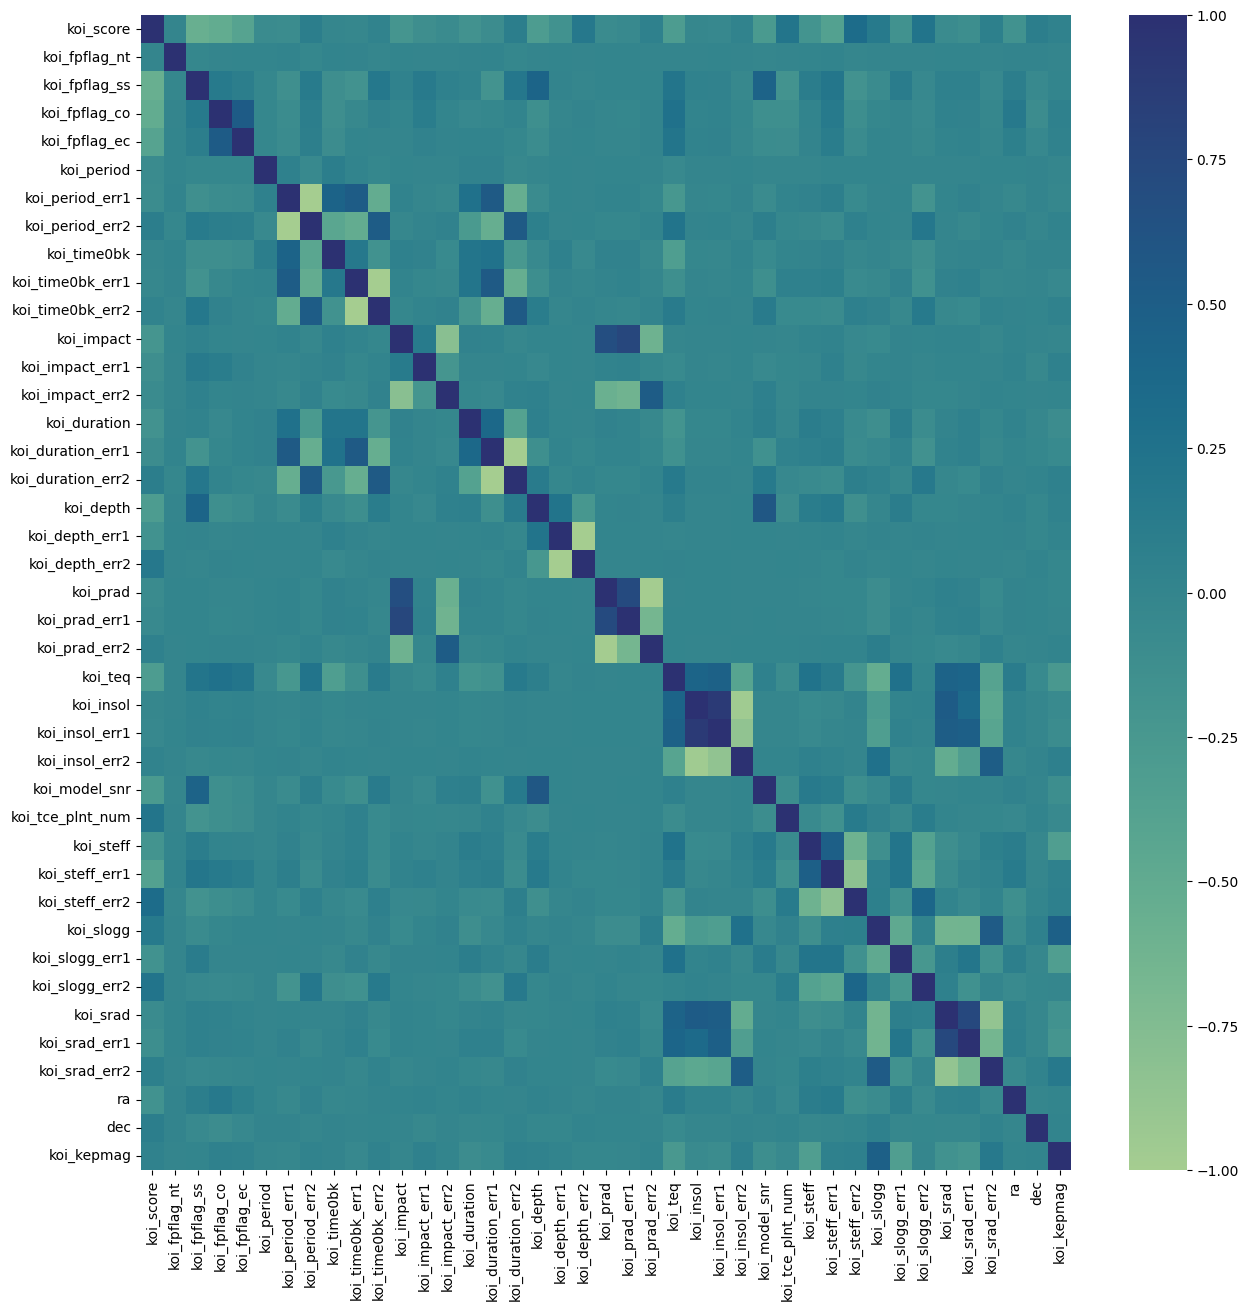

In [314]:
corr_matrix = numeric_data.corr(method='pearson')
plt.figure(figsize=(15,15))

sb.heatmap(corr_matrix, cmap='crest')

In [315]:
empty_num_cols = []
for col in num_data_info.keys():
    if num_data_info[col] > 0:
        empty_num_cols.append(col)

print(empty_num_cols)

['koi_score', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag']


In [316]:
numeric_imputer = SimpleImputer(strategy='median')
imputed_cols = numeric_imputer.fit_transform(X[empty_num_cols])

In [317]:
data_dict = {}
for i in range(imputed_cols.shape[1]):
    data_dict[empty_num_cols[i]] = imputed_cols[:,i]

data_dict

{'koi_score': array([1.   , 0.969, 0.   , ..., 0.021, 0.092, 0.   ]),
 'koi_period_err1': array([2.775e-05, 2.479e-04, 1.494e-05, ..., 2.434e-06, 4.235e-03,
        6.356e-05]),
 'koi_period_err2': array([-2.775e-05, -2.479e-04, -1.494e-05, ..., -2.434e-06, -4.235e-03,
        -6.356e-05]),
 'koi_time0bk_err1': array([0.00216 , 0.00352 , 0.000581, ..., 0.00285 , 0.00507 , 0.0108  ]),
 'koi_time0bk_err2': array([-0.00216 , -0.00352 , -0.000581, ..., -0.00285 , -0.00507 ,
        -0.0108  ]),
 'koi_impact': array([0.146, 0.586, 0.969, ..., 0.147, 0.214, 0.134]),
 'koi_impact_err1': array([0.318, 0.059, 5.126, ..., 0.309, 0.255, 0.323]),
 'koi_impact_err2': array([-0.146, -0.443, -0.077, ..., -0.147, -0.214, -0.134]),
 'koi_duration_err1': array([0.0819, 0.116 , 0.0341, ..., 0.162 , 0.229 , 0.283 ]),
 'koi_duration_err2': array([-0.0819, -0.116 , -0.0341, ..., -0.162 , -0.229 , -0.283 ]),
 'koi_depth': array([  615.8,   874.8, 10829. , ...,   103.6,   639.1,    76.7]),
 'koi_depth_err1': 

In [318]:
imputed_cols_dataframe = pd.DataFrame(data=data_dict)
imputed_cols_dataframe

,koi_score,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration_err1,koi_duration_err2,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
0,1.000,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.146,0.318,-0.146,0.08190,-0.08190,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347
1,0.969,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.586,0.059,-0.443,0.11600,-0.11600,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347
2,0.000,1.494000e-05,-1.494000e-05,0.000581,-0.000581,0.969,5.126,-0.077,0.03410,-0.03410,...,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,15.436
3,0.000,2.630000e-07,-2.630000e-07,0.000115,-0.000115,1.276,0.115,-0.092,0.00537,-0.00537,...,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,15.597
4,1.000,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.701,0.235,-0.478,0.04200,-0.04200,...,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,1.160000e-07,-1.160000e-07,0.000170,-0.000170,1.252,0.051,-0.049,0.01740,-0.01740,...,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,14.082
9560,0.497,1.780000e-05,-1.780000e-05,0.007690,-0.007690,0.043,0.423,-0.043,0.22900,-0.22900,...,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,14.757
9561,0.021,2.434000e-06,-2.434000e-06,0.002850,-0.002850,0.147,0.309,-0.147,0.16200,-0.16200,...,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,15.385
9562,0.092,4.235000e-03,-4.235000e-03,0.005070,-0.005070,0.214,0.255,-0.214,0.22900,-0.22900,...,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,10.998


In [319]:
ohe_cols = pd.get_dummies(X['koi_pdisposition'])

In [320]:
X = X.drop(columns= empty_num_cols)
X = X.drop(columns = ['koi_pdisposition'])

X = pd.concat([X, imputed_cols_dataframe, ohe_cols], axis=1)

In [321]:
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_duration,ra,dec,koi_score,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag,CANDIDATE,FALSE POSITIVE
0,0,0,0,0,9.488036,170.538750,2.95750,291.93423,48.141651,1.000,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347,1,0
1,0,0,0,0,54.418383,162.513840,4.50700,291.93423,48.141651,0.969,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347,1,0
2,0,0,0,0,19.899140,175.850252,1.78220,297.00482,48.134129,0.000,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,15.436,1,0
3,0,1,0,0,1.736952,170.307565,2.40641,285.53461,48.285210,0.000,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,15.597,0,1
4,0,0,0,0,2.525592,171.595550,1.65450,288.75488,48.226200,1.000,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,15.509,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0,1,1,0,0.527699,131.705093,3.22210,297.18875,47.093819,0.000,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,14.082,0,1
9560,0,0,0,0,1.739849,133.001270,3.11400,286.50937,47.163219,0.497,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,14.757,1,0
9561,0,0,1,0,0.681402,132.181750,0.86500,294.16489,47.176281,0.021,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,15.385,0,1
9562,0,0,0,0,333.486169,153.615010,3.19900,296.76288,47.145142,0.092,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,10.998,1,0


In [322]:
X.isnull().sum()

koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_time0bk          0
koi_duration         0
ra                   0
dec                  0
koi_score            0
koi_period_err1      0
koi_period_err2      0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
koi_kepmag           0
CANDIDATE            0
FALSE POSITIVE       0
dtype: int6

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
# Train a classification model (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

In [286]:
y_pred = model.predict(X_test)

In [291]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV

In [294]:
para_grid = {'n_estimators':[50,100,150,200,250,300,350,400],
             'class_weight':['balanced', 'balanced_subsample'],
             'criterion':['gini', 'entropy', 'log_loss']}

grd_srh = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=para_grid, cv=5, verbose=3)

In [295]:
grd_srh.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END class_weight=balanced, criterion=gini, n_estimators=50;, score=0.924 total time=   1.0s
[CV 2/5] END class_weight=balanced, criterion=gini, n_estimators=50;, score=0.924 total time=   0.8s
[CV 3/5] END class_weight=balanced, criterion=gini, n_estimators=50;, score=0.923 total time=   0.8s
[CV 4/5] END class_weight=balanced, criterion=gini, n_estimators=50;, score=0.924 total time=   0.8s
[CV 5/5] END class_weight=balanced, criterion=gini, n_estimators=50;, score=0.901 total time=   0.7s
[CV 1/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.926 total time=   1.7s
[CV 2/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.927 total time=   1.6s
[CV 3/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.922 total time=   1.6s
[CV 4/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.924 total time=   1.6s
[CV 5/5] END class_weight

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             verbose=3)

In [299]:
print(grd_srh.best_estimator_)
print(grd_srh.best_params_)
print(grd_srh.best_score_)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)
{'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 300}
0.9226233441340831


In [302]:
grd_y_pred = grd_srh.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=grd_y_pred)

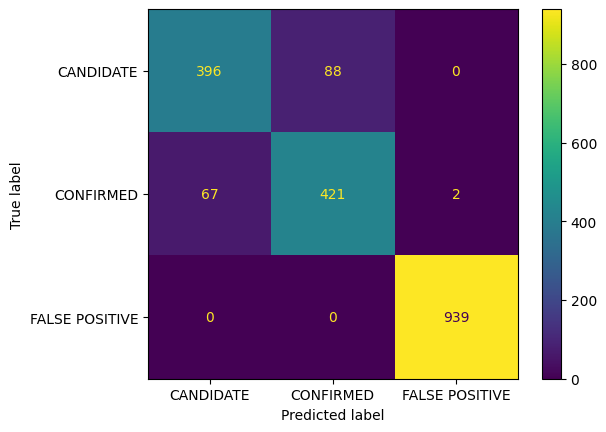

In [338]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grd_srh.classes_)
cm_display.plot()

In [339]:
accuracy_score(y_test, grd_y_pred)

0.9179299529534762

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [251]:
kneighbours = KNeighborsClassifier(n_neighbors=40).fit(X_train, y_train)

In [252]:
k_y_pred = kneighbours.predict(X_test)
accuracy_score(y_true=y_test, y_pred=k_y_pred)

0.6299006795608991